In [1]:
import pandas as pd

In [2]:
from pathlib import Path

**Reading data**

In [3]:
files = Path("./cic-ids-2017/MachineLearningCSV/").rglob("*.csv")

In [4]:
df = [pd.read_csv(file) for file in files]

In [5]:
df = pd.concat(df)

Renaming columns, removing spaces, switching to lowerecase.

In [6]:
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

**Renaming labels**

In [7]:
label_names = df['label'].unique()


import re

label_names = [re.sub("[^a-zA-Z ]+", "", l) for l in label_names]
label_names = [re.sub("[\s\s]", '_', l) for l in label_names]
label_names = [lab.replace("__", "_") for lab in label_names]

label_names, len(label_names)

(['BENIGN',
  'DDoS',
  'PortScan',
  'Bot',
  'Infiltration',
  'Web_Attack_Brute_Force',
  'Web_Attack_XSS',
  'Web_Attack_Sql_Injection',
  'FTPPatator',
  'SSHPatator',
  'DoS_slowloris',
  'DoS_Slowhttptest',
  'DoS_Hulk',
  'DoS_GoldenEye',
  'Heartbleed'],
 15)

In [8]:
# Replacing 'Label' column values with new readable values.

labels = df['label'].unique()

for i in range(0,len(label_names)):
    df['label'] = df['label'].replace({labels[i] : label_names[i]})

In [9]:
df.label.unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web_Attack_Brute_Force', 'Web_Attack_XSS',
       'Web_Attack_Sql_Injection', 'FTPPatator', 'SSHPatator',
       'DoS_slowloris', 'DoS_Slowhttptest', 'DoS_Hulk', 'DoS_GoldenEye',
       'Heartbleed'], dtype=object)

**Removing NULL values**

In [10]:
df.isnull().values.any()

True

In [11]:
[col for col in df if df[col].isnull().values.any()]

['flow_bytes/s']

In [12]:
df['flow_bytes/s'].isnull().sum()

1358

In [13]:
(1358 / df.shape[0])*100

0.04797327062188267

In [14]:
before = df.shape

df.dropna(inplace=True)

after = df.shape

before[0] - after[0]

1358

In [15]:
df.isnull().any().any()

False

**Removing infinite values**

In [16]:
import numpy as np

In [21]:
np.all(np.isfinite(df.iloc[:,:-1]))

False

In [22]:
# Checking what column/s contain non-finite values.

nonfinite = [col for col in df.iloc[:,:-1] if not np.all(np.isfinite(df[col]))]

nonfinite

['flow_bytes/s', 'flow_packets/s']

In [24]:
df.iloc[:,:-1] = df.iloc[:,:-1].replace([np.inf, -np.inf], np.nan)

np.any(np.isnan(df.iloc[:,:-1]))

True

In [26]:
before = df.shape
print("Before drop", before)

df.dropna(inplace=True)

print("After drop", df.shape)
print("The difference", before[0] - df.shape[0])

del before

Before drop (2827876, 79)
After drop (2827876, 79)
The difference 0


In [27]:
np.all(np.isfinite(df.iloc[:,:-1]))

True

**Saving clean data**

In [28]:
df.to_csv("clean1.csv", index=False)

**Data visualization**

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
label_groupby = df.label.value_counts()
labels_df = pd.DataFrame({
    'Count':label_groupby, 
    'Ratio':label_groupby/sum(label_groupby),
    'Ratio(%)':(label_groupby/sum(label_groupby))*100
})
labels_df

,Count,Ratio,Ratio(%)
BENIGN,2271320,0.803189,80.318939
DoS_Hulk,230124,0.081377,8.137698
PortScan,158804,0.056157,5.615663
DDoS,128025,0.045272,4.527249
DoS_GoldenEye,10293,0.003640,0.363983
FTPPatator,7935,0.002806,0.280599
SSHPatator,5897,0.002085,0.208531
DoS_slowloris,5796,0.002050,0.204959
DoS_Slowhttptest,5499,0.001945,0.194457
Bot,1956,0.000692,0.069169


c:\users\marko\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'BENIGN'),
  Text(1, 0, 'DDoS'),
  Text(2, 0, 'PortScan'),
  Text(3, 0, 'Bot'),
  Text(4, 0, 'Infiltration'),
  Text(5, 0, 'Web_Attack_Brute_Force'),
  Text(6, 0, 'Web_Attack_XSS'),
  Text(7, 0, 'Web_Attack_Sql_Injection'),
  Text(8, 0, 'FTPPatator'),
  Text(9, 0, 'SSHPatator'),
  Text(10, 0, 'DoS_slowloris'),
  Text(11, 0, 'DoS_Slowhttptest'),
  Text(12, 0, 'DoS_Hulk'),
  Text(13, 0, 'DoS_GoldenEye'),
  Text(14, 0, 'Heartbleed')])

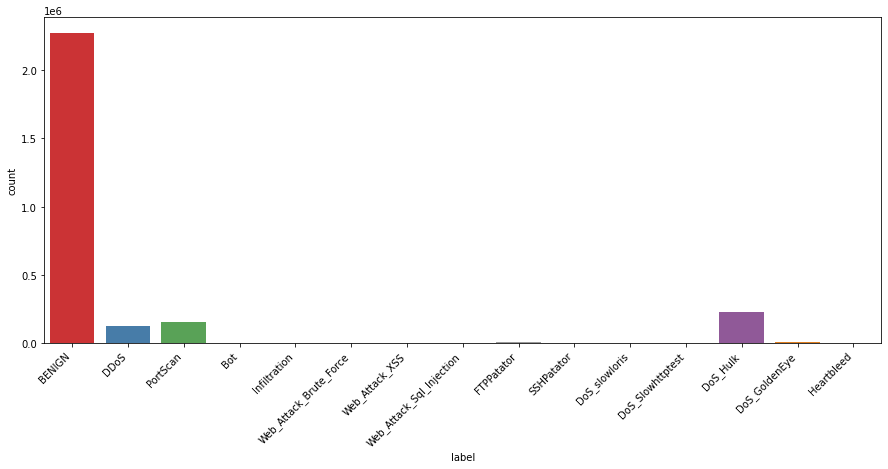

In [31]:
plt.figure(figsize=(15,6))
chart = sns.countplot(df.label, palette="Set1")
plt.xticks(rotation=45, horizontalalignment="right")

In [32]:
data = df.label.value_counts()

various = sum(data[4:])

data = data[:4]

data['Various'] = various

data

BENIGN      2271320
DoS_Hulk     230124
PortScan     158804
DDoS         128025
Various       39603
Name: label, dtype: int64

Text(0.5, 1.0, 'Udio klasa u skupu podataka')

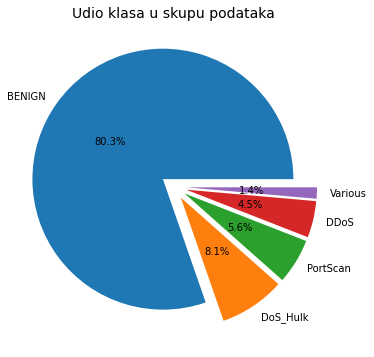

In [33]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=data, autopct="%.1f%%", explode=[0.1]*len(data), labels=data.index, pctdistance=0.5)
plt.title("Udio klasa u skupu podataka", fontsize=14)

c:\users\marko\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'DDoS'),
  Text(1, 0, 'PortScan'),
  Text(2, 0, 'Bot'),
  Text(3, 0, 'Infiltration'),
  Text(4, 0, 'Web_Attack_Brute_Force'),
  Text(5, 0, 'Web_Attack_XSS'),
  Text(6, 0, 'Web_Attack_Sql_Injection'),
  Text(7, 0, 'FTPPatator'),
  Text(8, 0, 'SSHPatator'),
  Text(9, 0, 'DoS_slowloris'),
  Text(10, 0, 'DoS_Slowhttptest'),
  Text(11, 0, 'DoS_Hulk'),
  Text(12, 0, 'DoS_GoldenEye'),
  Text(13, 0, 'Heartbleed')])

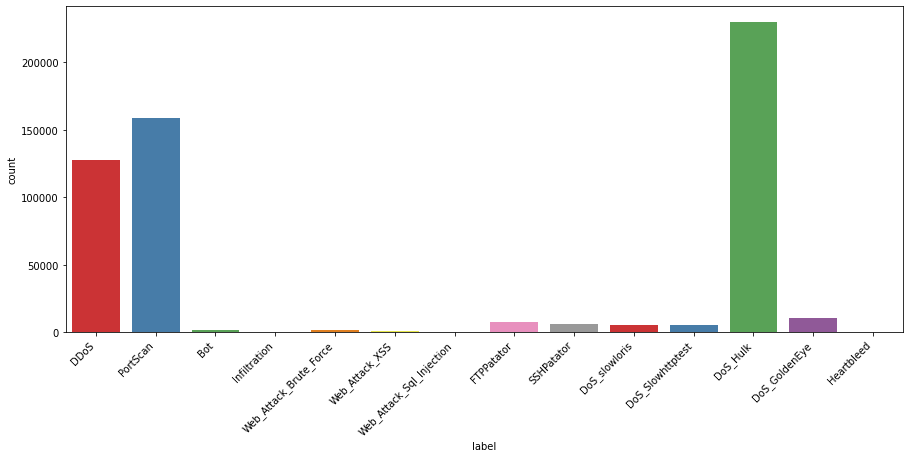

In [34]:
plt.figure(figsize=(15,6))
chart = sns.countplot(df.label.where(df.label != "BENIGN"), palette="Set1")
plt.xticks(rotation=45, horizontalalignment="right")

In [35]:
data_2 = df.where(df.label != "BENIGN").label.value_counts()

various = sum(data_2[3:])

data_2 = data_2[:3]

data_2['Various'] = various

data_2

DoS_Hulk    230124
PortScan    158804
DDoS        128025
Various      39603
Name: label, dtype: int64

Text(0.5, 1.0, 'Udio klasa bez BENIGN klase')

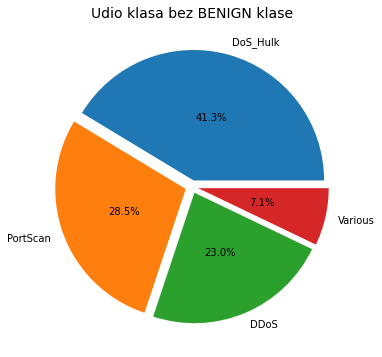

In [36]:
pie, ax = plt.subplots(figsize=[10,6]) 
plt.pie(x=data_2, autopct="%.1f%%", explode=[0.05]*len(data_2), labels=data_2.index, pctdistance=0.5)
plt.title("Udio klasa bez BENIGN klase", fontsize=14)